In [1]:
import os
os.chdir('/Users/jonas/Desktop/Books/Think Stats 2 - Allen B Downey/ThinkStats2-master/code')

In [2]:
from __future__ import print_function, division

import numpy as np

import brfss

import thinkstats2
import thinkplot

In [3]:
df = brfss.ReadBrfss(nrows=None)

In [4]:
# Here are the mean and standard deviation of female height in cm.


female = df[df.sex==2]
female_heights = female.htm3.dropna()
mean, std = female_heights.mean(), female_heights.std()
mean, std

(163.22347500412215, 7.269156286642232)

In [ ]:
# NormalPdf returns a Pdf object that represents the normal distribution with the given parameters.

# Density returns a probability density, which doesn't mean much by itself.

In [5]:
pdf = thinkstats2.NormalPdf(mean, std)
pdf.Density(mean + std)

0.033287319047437085

In [6]:
# thinkplot provides Pdf, which plots the probability density with a smooth curve.

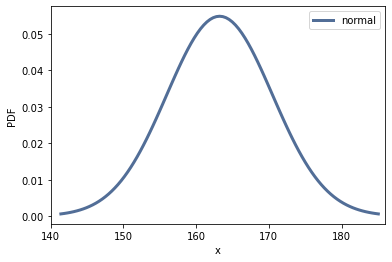

In [7]:
thinkplot.Pdf(pdf, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF', xlim=[140, 186])

In [8]:
# Pdf provides MakePmf, which returns a Pmf object that approximates the Pdf.

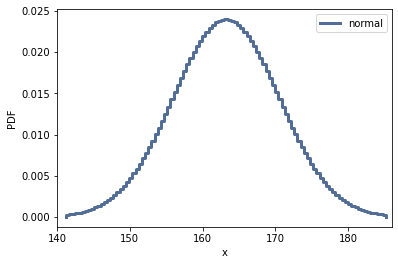

In [9]:
pmf = pdf.MakePmf()
thinkplot.Pmf(pmf, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF', xlim=[140, 186])

In [10]:
# If you have a Pmf, you can also plot it using Pdf, if you have reason to think it should be represented as a smooth curve.

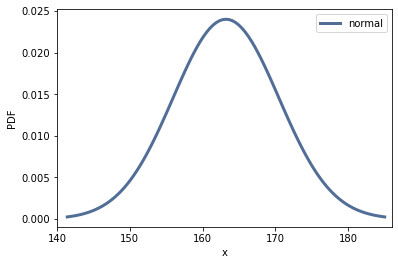

In [11]:
thinkplot.Pdf(pmf, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF', xlim=[140, 186])

In [12]:
# Using a sample from the actual distribution, we can estimate the PDF using Kernel Density Estimation (KDE).

# If you run this a few times, you'll see how much variation there is in the estimate.

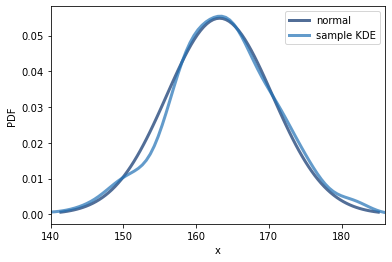

In [13]:
thinkplot.Pdf(pdf, label='normal')

sample = np.random.normal(mean, std, 500)
sample_pdf = thinkstats2.EstimatedPdf(sample, label='sample')
thinkplot.Pdf(sample_pdf, label='sample KDE')
thinkplot.Config(xlabel='x', ylabel='PDF', xlim=[140, 186])

In [14]:
# Raw moments are just sums of powers.

In [15]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

In [17]:
# The first raw moment is the mean. The other raw moments don't mean much.

RawMoment(female_heights, 1), RawMoment(female_heights, 2), RawMoment(female_heights, 3)

(163.22347500412215, 26694.74321809659, 4374411.46250422)

In [18]:
def Mean(xs):
    return RawMoment(xs, 1)

Mean(female_heights)

163.22347500412215

In [19]:
# The central moments are powers of distances from the mean.

In [20]:
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

In [21]:
# The first central moment is approximately 0. The second central moment is the variance.

In [22]:
CentralMoment(female_heights, 1), CentralMoment(female_heights, 2), CentralMoment(female_heights, 3)

(-9.903557940122168e-14, 52.84042567529328, -46.88569506887073)

In [23]:
def Var(xs):
    return CentralMoment(xs, 2)

Var(female_heights)

52.84042567529328

In [24]:
# The standardized moments are ratios of central moments, with powers chosen to make the dimensions cancel.

In [25]:
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

In [26]:
# The third standardized moment is skewness.

In [27]:
StandardizedMoment(female_heights, 1), StandardizedMoment(female_heights, 2), StandardizedMoment(female_heights, 3)

(-1.3624108479155668e-14, 1.0, -0.1220649274510512)

In [28]:
def Skewness(xs):
    return StandardizedMoment(xs, 3)

Skewness(female_heights)

-0.1220649274510512

In [29]:
# Normally a negative skewness indicates that the distribution has a longer tail on the left. In that case, the mean is usually less than the median.

In [30]:
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

In [32]:
# But in this case the mean is greater than the median, which indicates skew to the right.

In [33]:
Mean(female_heights), Median(female_heights)

(163.22347500412215, 163.0)

In [34]:
# Because the skewness is based on the third moment, it is not robust; that is, it depends strongly on a few outliers. Pearson's median skewness is more robust.

In [35]:
def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

In [36]:
# Pearson's skewness is positive, indicating that the distribution of female heights is slightly skewed to the right.

In [37]:
PearsonMedianSkewness(female_heights)

0.0922289055190516

In [38]:
# Let's look at the distribution of birth weights again.

In [39]:
import first

live, firsts, others = first.MakeFrames()

In [40]:
# Based on KDE, it looks like the distribution is skewed to the left.

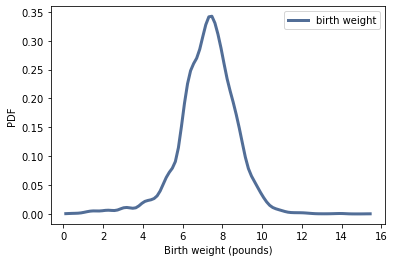

In [41]:
birth_weights = live.totalwgt_lb.dropna()
pdf = thinkstats2.EstimatedPdf(birth_weights)
thinkplot.Pdf(pdf, label='birth weight')
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='PDF')

In [42]:
# The mean is less than the median, which is consistent with left skew.
Mean(birth_weights), Median(birth_weights)

(7.265628457623368, 7.375)

In [43]:
# And both ways of computing skew are negative, which is consistent with left skew.
Skewness(birth_weights), PearsonMedianSkewness(birth_weights)

(-0.5895062687577989, -0.23300028954731833)

In [44]:
# Now let's look at adult weights from the BRFSS. The distribution looks skewed to the right.

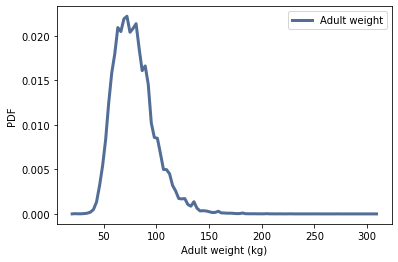

In [45]:
adult_weights = df.wtkg2.dropna()
pdf = thinkstats2.EstimatedPdf(adult_weights)
thinkplot.Pdf(pdf, label='Adult weight')
thinkplot.Config(xlabel='Adult weight (kg)', ylabel='PDF')

In [46]:
# The mean is greater than the median, which is consistent with skew to the right.

In [47]:
Mean(adult_weights), Median(adult_weights)

(78.99245299687198, 77.27)

In [48]:
# And both ways of computing skewness are positive.
Skewness(adult_weights), PearsonMedianSkewness(adult_weights)

(1.054840012109306, 0.2643673381618039)